In [ ]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import numpy
import scipy
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import sys

print(sys.path)
sys.path += ['/content/drive/Othercomputers/我的笔记本电脑/Research']
sys.path += ['/content/drive/MyDrive/informer/Informer2020']
sys.path += ['/content/drive/MyDrive/informer/ETDataset']
sys.path += ['/content/drive/Othercomputers/我的笔记本电脑/Research/file_resource']
if not 'Informer2020' in sys.path:
    sys.path += ['Informer2020']

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['/content', '/env/python', '/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '', '/usr/local/lib/python3.10/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.10/dist-packages/IPython/extensions', '/root/.ipython']


In [3]:
!pip install wfdb
!pip install statsmodels==0.14.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 55.3 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.13.5
    Uninstalling statsmodels-0.13.5:
      Successfully uninstalled statsmodels-0.13.5


In [3]:
import statsmodels.api as sm
import itertools
import pandas as pd
import matplotlib.pyplot as plt
# hr2 = pd.read_csv("file_resource/ecg-id-database-1.0.0/Person_03",names=["hr"])
# print(hr2.head())
# create new datatime index to hr2, every 0.5s

import wfdb
import matplotlib.pyplot as plt

# Specify the path to your downloaded data
path_to_data = '/content/drive/Othercomputers/我的笔记本电脑/Research/file_resource/ecg-id-database-1.0.0/Person_03/'

# The record name is the filename without the extension
record_name = 'rec_1'

# Use the 'rdrecord' function to read the ECG data
record = wfdb.rdrecord(f'{path_to_data}/{record_name}')
# Plot the ECG data
plt.figure(figsize=(10, 4))
plt.plot(record.p_signal[:,1])
plt.title('ECG Signal')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.show()
hr2 = pd.DataFrame(record.p_signal[:,1],columns=["hr"])


datetime_series = pd.Series(
    pd.date_range("2000-01-01", periods=10000, freq="2ms")
)
#
hr2.set_index(datetime_series,inplace=True)

hr2_train = hr2[:8000]
hr2_test = hr2[8000:]
plt.plot(hr2)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\content\\drive\\Othercomputers\\我的笔记本电脑\\Research\\file_resource\\ecg-id-database-1.0.0\\Person_03\\rec_1.hea'

In [ ]:
# import statsmodels.api as sm
# import itertools
# hr2 = pd.read_csv("file_resource/hr.7257",names=["hr"])
# print(hr2.head())
# # create new datatime index to hr2, every 0.5s
# datetime_series = pd.Series(
#     pd.date_range("2000-01-01", periods=1800, freq="s")
# )

# hr2.set_index(datetime_series,inplace=True)
# # index = pd.DatetimeIndex(datetime_series)
# # hr2.index.freq = '1s'
# data = hr2.rolling(30,min_periods=1).mean()

# hr2_train = data.iloc[:1600]
# hr2_test = data.iloc[1600:]
# plt.plot(hr2_train)
# plt.show()

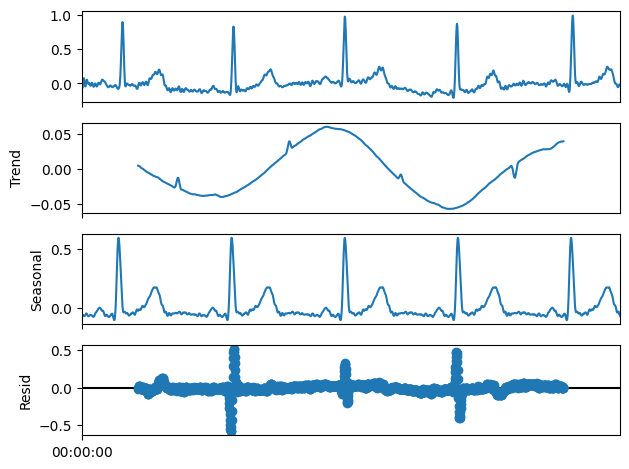

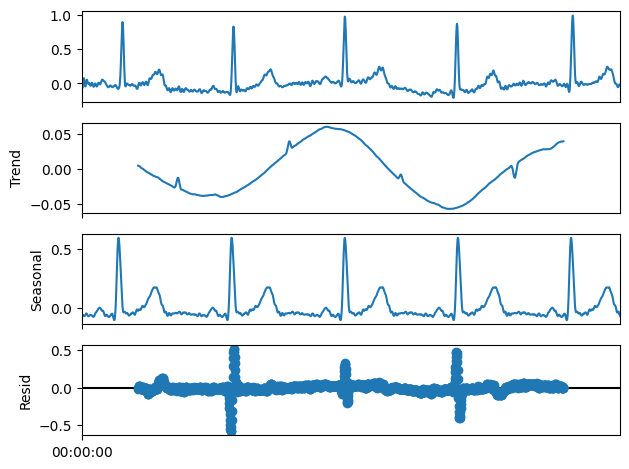

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(hr2_train[0:2000], period = 420)
result.plot()

In [6]:
from statsmodels.tools.sm_exceptions import ValueWarning 
warnings.simplefilter('ignore', ValueWarning)

NameError: ignored

In [ ]:


# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

p = d = q = range(0, 2)
seasonal_pdq = [(x[0], x[1], x[2], 420) for x in list(itertools.product(p, d, q))]
# Generate all different combinations of seasonal p, q and q triplets
out=[]
AIC=[]
num_par=[]
count = 0
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(hr2_train[:1000],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit(model="cg",maxiter=50)
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            out.append((param, param_seasonal))
            AIC.append( results.aic)
            num_par.append(np.sum(param)+np.sum(param_seasonal)-12)
        except:
            continue

AIC_np=np.array(AIC)
num_par_np=np.array(num_par)


plt.figure()
plt.scatter(num_par_np,AIC_np)

ind=np.where((AIC_np<1000)*(num_par_np==1))[0][0]

# seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
# mod =  sm.tsa.statespace.SARIMAX(hr2[0:len(hr2)-250],
#                                 order=(4,1,1),seasonal_order=(0,0,0,64),                                            enforce_stationarity=False,
#                                             enforce_invertibility=False)
#
# results = mod.fit()
# results.plot_diagnostics(figsize=(15, 12))
# print(results.aic)
# plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 2L will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 2L will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: model. After release 0.14, this will raise.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 2L will be used.
 

ARIMA(0, 0, 0)x(0, 0, 0, 420)12 - AIC:-870.7551884382048


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: model. After release 0.14, this will raise.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 2L will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: Value

In [2]:
mod = sm.tsa.statespace.SARIMAX(hr2_train[0:1000],
                                            order=(0,0,1),
                                            seasonal_order=(0, 2, 0, 420),
                                            enforce_stationarity=False,
                                            enforce_invertibility=False
                                )

results = mod.fit(method="cg",maxiter=50)
results.plot_diagnostics(figsize=(15, 12))
print(results.aic)
plt.show()

NameError: name 'hr2_train' is not defined

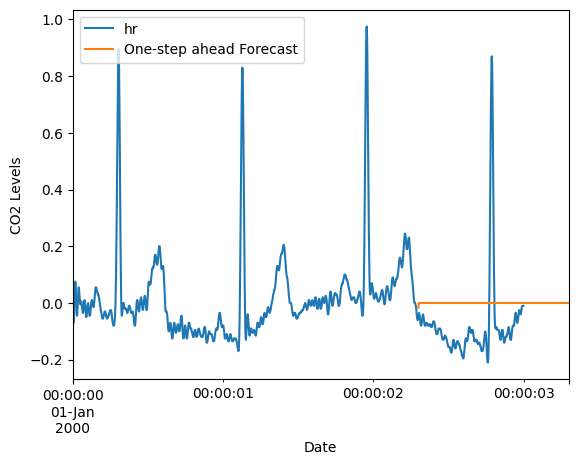

<Axes: >

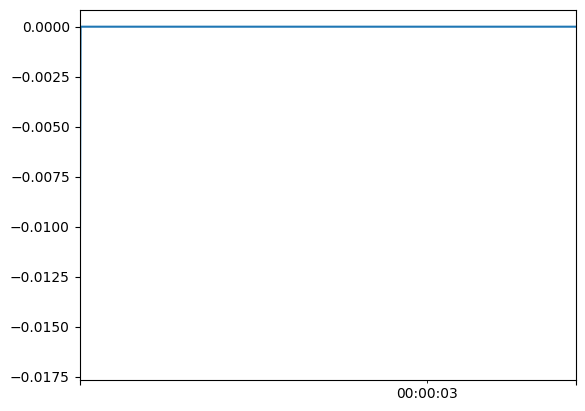

In [ ]:
pred = results.get_prediction(start=1000,end=1500,dynamic=False)
pred_ci = pred.conf_int()
# plt.plot(data)
ax = hr2_train[0:1500].plot()
# hr2_test.plot(label='observed',ax=ax)

pred.predicted_mean.plot(label='One-step ahead Forecast')

# ax.fill_between(pred_ci.index,
#                 pred_ci.iloc[:, 0],
#                 pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()

plt.show()
pred.predicted_mean.plot(label='One-step ahead Forecast')


In [ ]:
from pmdarima.arima import auto_arima
model = auto_arima(hr2_train[0:1000], start_p=0, start_q=0,
                      test='adf',
                      max_p=5, max_q=5,
                      m=1,             
                      d=1,          
                      seasonal=True,   
                      start_P=0, 
                      D=None, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)